<a href="https://colab.research.google.com/github/Saksham0905/OnlineShopping/blob/main/mlproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
data=pd.read_csv('/content/online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
missing=data.isnull().sum()
print(missing)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
data.shape

(12330, 18)

In [ ]:
x=data.iloc[:,[5,6]].values
x.shape

(12330, 2)

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1408: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



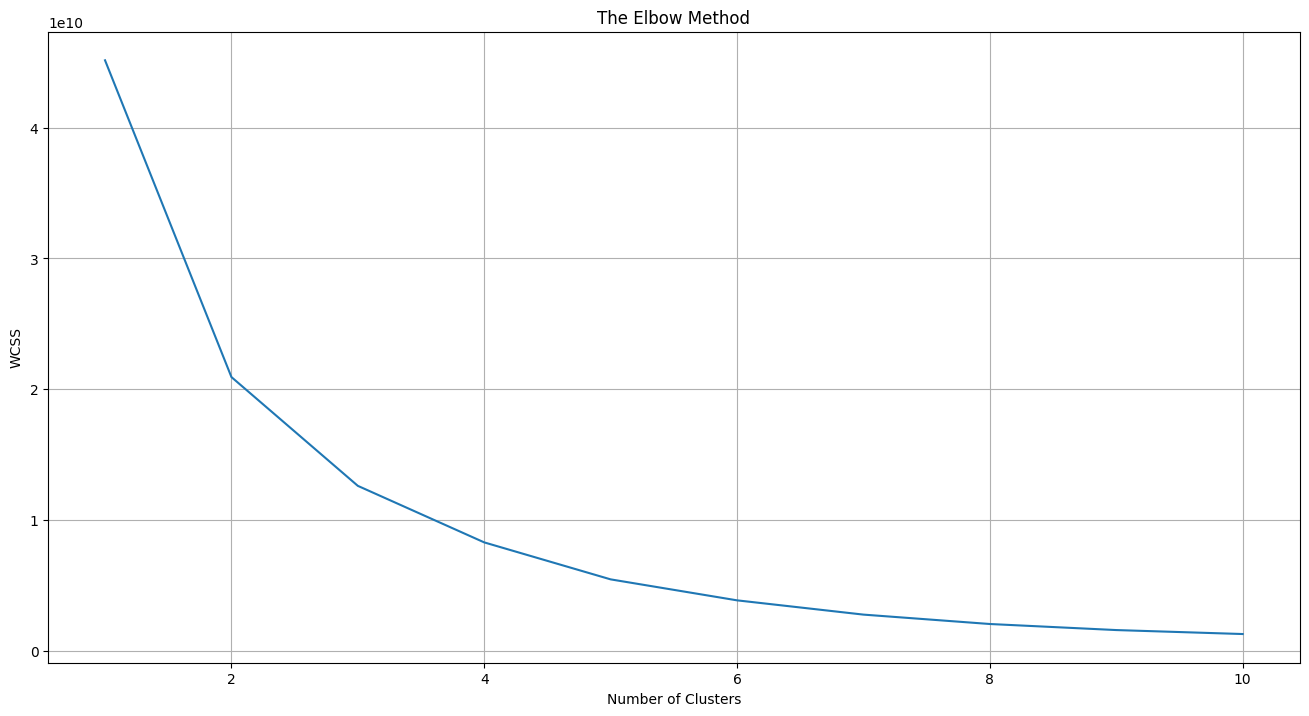

In [ ]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,
            init='k-means++',
            tol=0.001,
            n_init=10,
            max_iter=300,
            random_state=0,
            algorithm='elkan')
  km.fit(x)
  labels=km.labels_
  wcss.append(km.inertia_)

plt.rcParams['figure.figsize']=(13,7)
plt.plot(range(1,11),wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



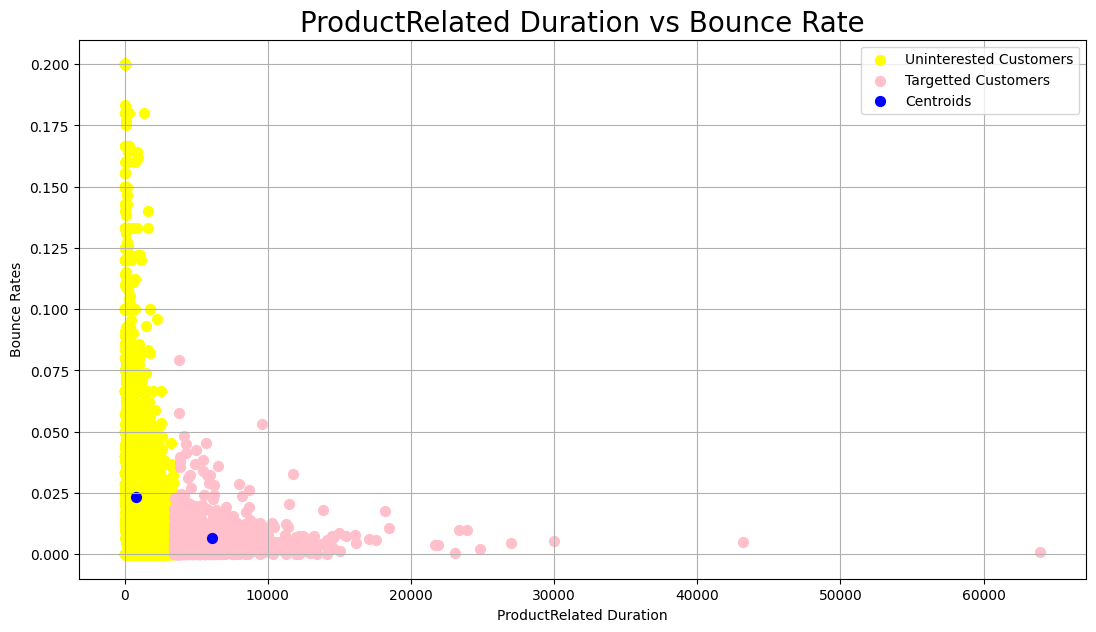

In [ ]:
km=KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)
plt.scatter(x[y_means==0,0],x[y_means==0,1],c='yellow',s=50,label='Uninterested Customers')
plt.scatter(x[y_means==1,0],x[y_means==1,1],c='pink',s=50,label='Targetted Customers')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='blue',label='Centroids')
plt.title('ProductRelated Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [ ]:
pip install scikit-plot==0.3.7


Adjusted Rand Index:
0.08359442469281096


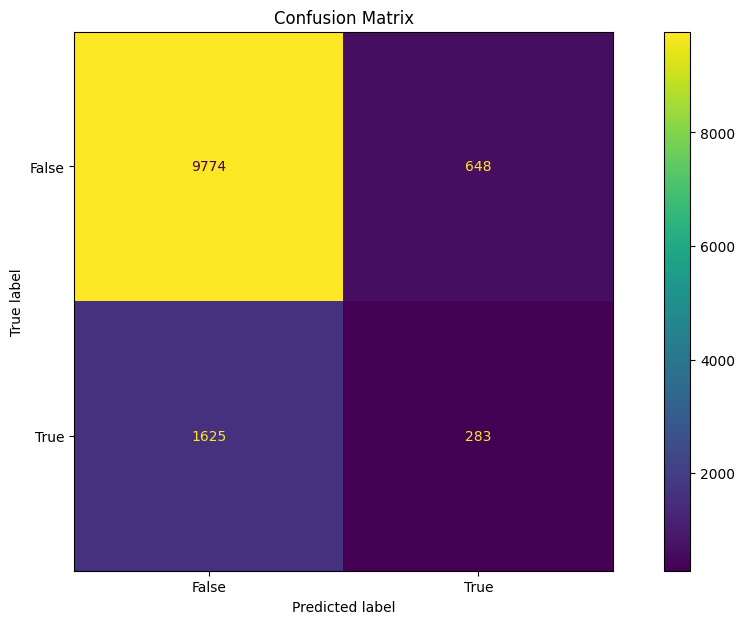

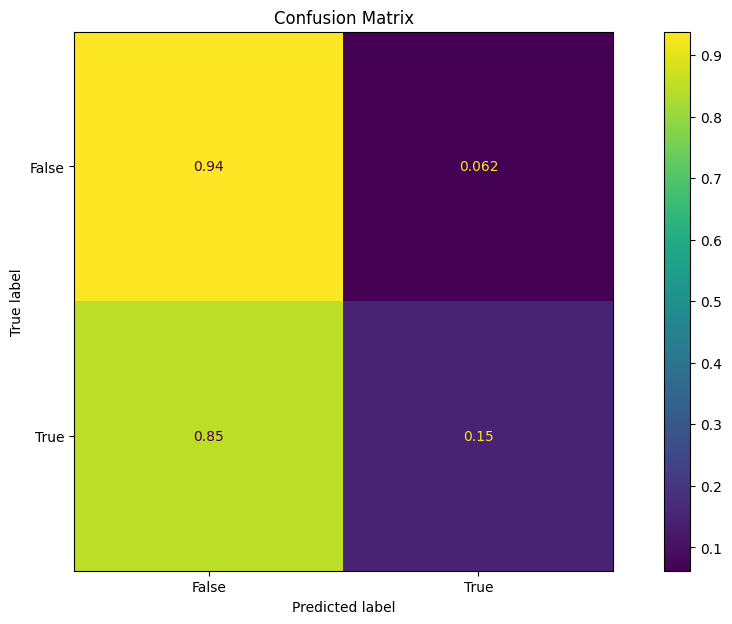

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, adjusted_rand_score
import matplotlib.pyplot as plt
import numpy as np

# Encode true labels
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])

# Predicted clustering result labels
labels_pred = y_means

# Print adjusted rand index
score = adjusted_rand_score(labels_true, labels_pred)
print("Adjusted Rand Index:")
print(score)

# Plot confusion matrix without using scikit-plot
cm = confusion_matrix(labels_true, labels_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='viridis', colorbar=True)

# Show the confusion matrix
plt.title("Confusion Matrix")
plt.show()
cm = confusion_matrix(labels_true, labels_pred,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='viridis', colorbar=True)

# Show the confusion matrix
plt.title("Confusion Matrix")
plt.show()
